# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing
Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk




# ANSWERS


<ipython-input-2-31be96a49ae8>:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC) # visualize image using imshow function
<ipython-input-2-31be96a49ae8>:7: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


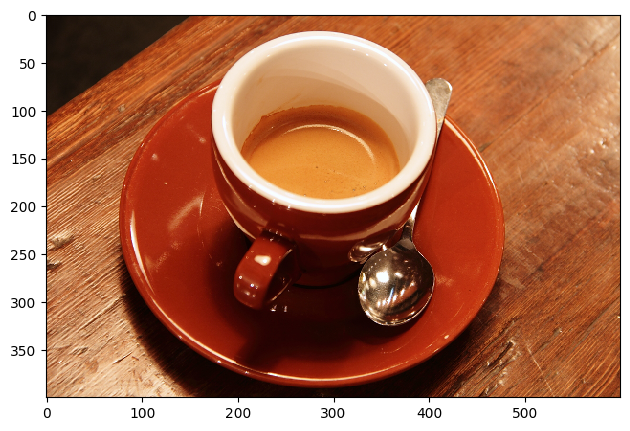

M = 400 columns, N = 600 rows, NC = 3 color channels


In [2]:
#Task 1
import skimage as sk # load skimage libraries
IC = sk.data.coffee() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

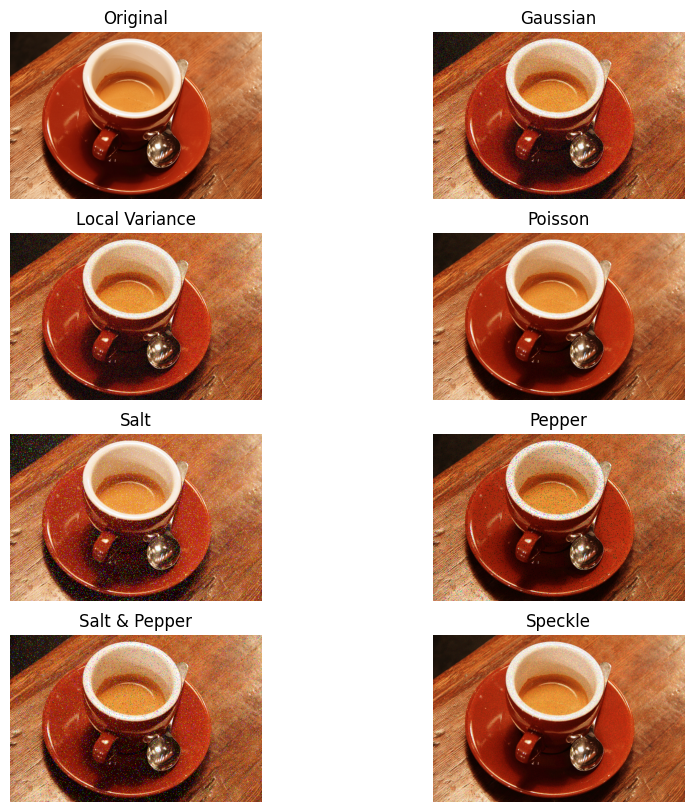

In [23]:
#Task 2
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
IC = sk.data.coffee() #original image
gaussian = sk.util.random_noise(IC, mode='gaussian', rng=None, clip=True) #gaussian noise
localvar = sk.util.random_noise(IC, mode='localvar', rng=None, clip=True) #gaussian with local variance
poisson = sk.util.random_noise(IC, mode='poisson', rng=None, clip=True) #poisson noise
salt = sk.util.random_noise(IC, mode='salt', rng=None, clip=True) #salt noise
pepper = sk.util.random_noise(IC, mode='pepper', rng=None, clip=True) #pepper noise
sp = sk.util.random_noise(IC, mode='s&p', rng=None, clip=True) #salt and pepper noise
speckle = sk.util.random_noise(IC, mode='speckle', rng=None, clip=True) #peckle noise

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
for ax in axs.flat:
    ax.axis("off")
axs[0, 0].set_title('Original')
axs[0, 0].imshow(IC)
axs[0, 1].set_title('Gaussian')
axs[0, 1].imshow(gaussian)
axs[1, 0].set_title('Local Variance')
axs[1, 0].imshow(localvar)
axs[1, 1].set_title('Poisson')
axs[1, 1].imshow(poisson)
axs[2, 0].set_title('Salt')
axs[2, 0].imshow(salt)
axs[2, 1].set_title('Pepper')
axs[2, 1].imshow(pepper)
axs[3, 0].set_title('Salt & Pepper')
axs[3, 0].imshow(sp)
axs[3, 1].set_title('Speckle')
axs[3, 1].imshow(speckle)
plt.show()

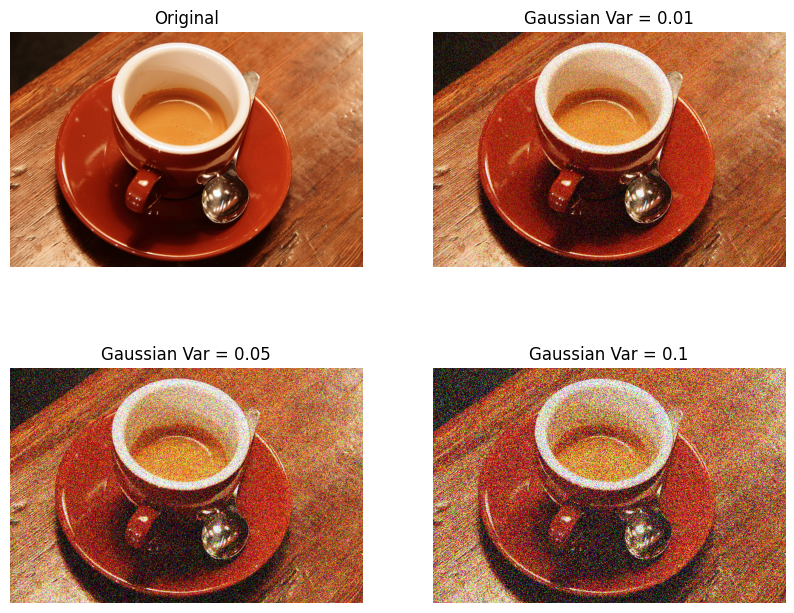

In [19]:
#Task 3
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
IC = sk.data.coffee() #original image
gaus1 = sk.util.random_noise(IC, mode='gaussian', rng=None, clip=True, var=0.01)
gaus2 = sk.util.random_noise(IC, mode='gaussian', rng=None, clip=True, var=0.05)
gaus3 = sk.util.random_noise(IC, mode='gaussian', rng=None, clip=True, var=0.1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for ax in axs.flat:
    ax.axis("off")
axs[0, 0].set_title('Original')
axs[0, 0].imshow(IC)
axs[0, 1].set_title('Gaussian Var = 0.01')
axs[0, 1].imshow(gaus1)
axs[1, 0].set_title('Gaussian Var = 0.05')
axs[1, 0].imshow(gaus2)
axs[1, 1].set_title('Gaussian Var = 0.1')
axs[1, 1].imshow(gaus3)
plt.show()

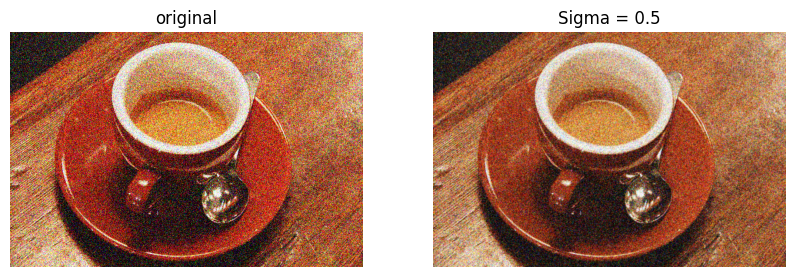

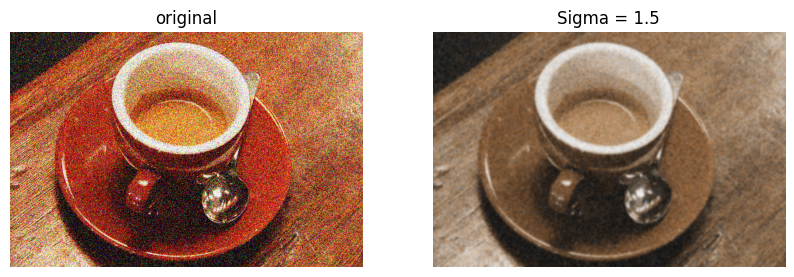

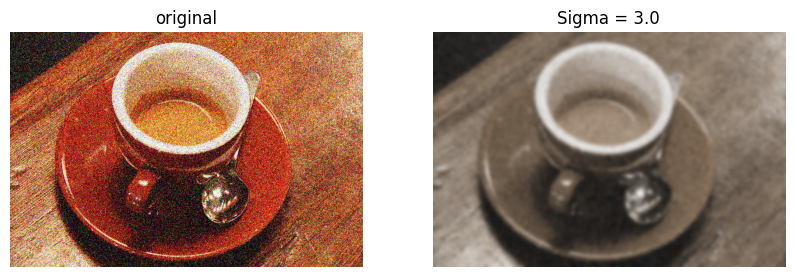

In [31]:
#Task 4
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
from skimage.filters import gaussian

# Medium Noise on Original Image
gaus2 = sk.util.random_noise(IC, mode='gaussian', rng=None, clip=True, var=0.05)

# Apply Gaussian filter with different sigma values
fil1 = gaussian(gaus2, sigma=0.5)
fil2 = gaussian(gaus2, sigma=1.5)
fil3 = gaussian(gaus2, sigma=3.0)

# Plotting
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
plot_comparison(gaus2,fil1,'Sigma = 0.5')
plot_comparison(gaus2,fil2,'Sigma = 1.5')
plot_comparison(gaus2,fil3,'Sigma = 3.0')

**Results**: As the sigma value increases, the smoothing/blurring of the image is also affected. With low sigma, the noise is slightly reduced but the details of the image is still preserved. However, with high sigma the noise is mostly reduced but most of the details of the image can't be preserved and the image looks blurry.

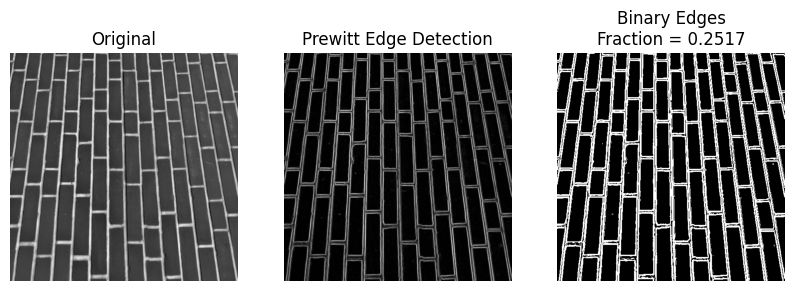

In [42]:
#Task 5
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
from skimage.filters import prewitt

# Edge Detection
IM = sk.data.brick() #Original Image
edge = prewitt(IM)

# Threshold: define edges as pixels with gradient > threshold
threshold = 0.05
binary_edges = edge > threshold

# Calculate fraction of edge pixels
total_pixels = binary_edges.size
edge_pixels = np.sum(binary_edges)
edge_fraction = edge_pixels / total_pixels

# Plotting
fig, axs = plt.subplots(ncols=3, figsize=(10, 8))
for ax in axs.flat:
    ax.axis("off")
axs[0].set_title('Original')
axs[0].imshow(IM, cmap='gray')
axs[1].set_title('Prewitt Edge Detection')
axs[1].imshow(edge, cmap='gray')
axs[2].set_title(f"Binary Edges\nFraction = {edge_fraction:.4f}")
axs[2].imshow(binary_edges, cmap='gray')
plt.show()

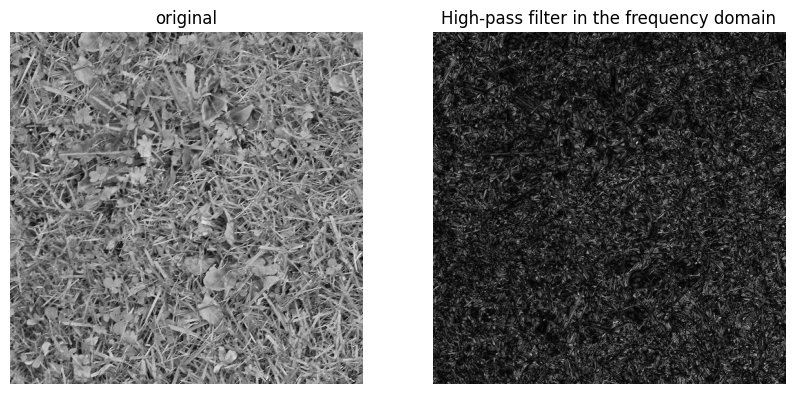

In [53]:
#Task 6
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt

IG = sk.data.grass() #Original image
#gIG = rgb2gray(IG) #grayscale

f = np.fft.fft2(IG) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

# High Pass Filter
rows, cols = IG.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Plotting
plot_comparison(IG,img_back, 'High-pass filter in the frequency domain')

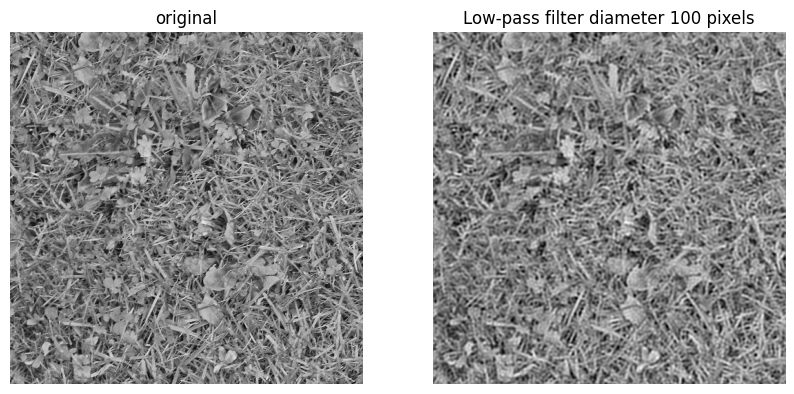

In [54]:
# Low Pass Filter Disk = 50
nrows, ncols = IG.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(IG)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Plotting
plot_comparison(IG,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

**Results**: Both fine textures and areas of greater intensity compose the spatial patterns in the original grass image. Only the subtle details and sudden changes in intensity are retained after the high-pass filter is applied, emphasizing the edges of grass blades and textures that resemble noise. The low-pass filter, on the other hand, blurs the original by reducing the high-frequency components and keeping only the wide, gradually changing patterns. This illustrates how low-frequency components in the Fourier domain reflect the image's general structure and smooth variations, while high-frequency components correspond to fine spatial details.

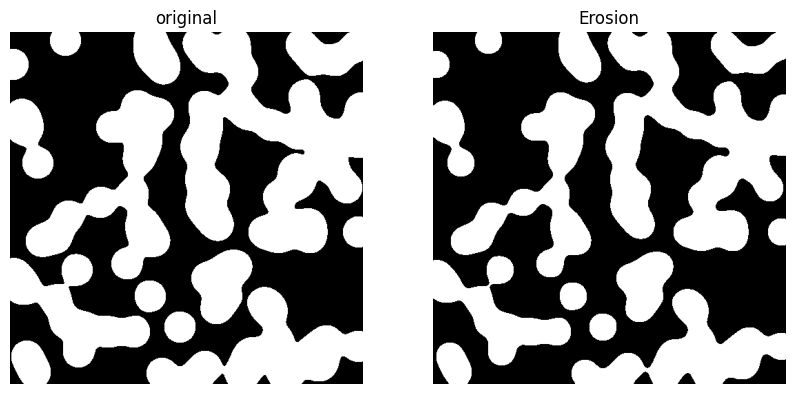

In [57]:
# Task 7
from skimage.morphology import erosion, disk

# Generate Blobs
blob = sk.data.binary_blobs(length=512, blob_size_fraction=0.1, n_dim=2, volume_fraction=0.5, rng=None)

# Erosion
selem = disk(3) #disk of 3 pixels
eroded = erosion(blob, selem)

# Plotting
plot_comparison(blob, eroded, 'Erosion')

**Results**: With disk = 3 the change is not that much to remove all the blobs.